In [143]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor


#Read CSV file into "boardgames" Dataframe
boardgames=pd.read_csv("C:/Users/Leonardo Barrera/OneDrive/Projects Data Science/dataset.json/Which Board Game to play/BGG_Data_Set.csv")

#Review general information of Dataframe
boardgames.info()
boardgames.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [144]:
#Creating a function to understand data quality
def base_info(df):
    info_df=pd.DataFrame(index=boardgames.columns)
    info_df["DataType"]=df.dtypes
    info_df["Not null values"]=df.count()
    info_df["Null values"]=df.isnull().sum()
    info_df["Percentage of Null Values"]=(df.isnull().mean())*100
    info_df["Unique Count"]=df.nunique()
    return info_df

display(base_info(boardgames))


,DataType,Not null values,Null values,Percentage of Null Values,Unique Count
ID,float64,20327,16,0.078651,20327
Name,object,20343,0,0.000000,19976
Year Published,float64,20342,1,0.004916,188
Min Players,int64,20343,0,0.000000,11
Max Players,int64,20343,0,0.000000,54
Play Time,int64,20343,0,0.000000,116
Min Age,int64,20343,0,0.000000,21
Users Rated,int64,20343,0,0.000000,2973
Rating Average,float64,20343,0,0.000000,622
BGG Rank,int64,20343,0,0.000000,20343


In [145]:
#Cleaning Data

#Cleaning ID: Replacing NaN values for the last ID number +1
boardgames["ID"].fillna(value=boardgames["ID"].max()+1, inplace=True)
boardgames["ID"]=boardgames["ID"].astype(int)

#Fixing "Year Published"
boardgames=boardgames[boardgames["Year Published"] != 2022]
boardgames=boardgames.dropna(subset=["Year Published"])
boardgames["Year Published"]=boardgames["Year Published"].astype(int)

#Fixing "Onwed Users"
boardgames[boardgames["Owned Users"].isna()]=0
boardgames=boardgames[boardgames["Owned Users"] != 0]
boardgames["Owned Users"]=boardgames["Owned Users"].astype(int)

#Fixing "Domains"
boardgames["Domains"].fillna(value="Unknown Domain", inplace=True)

#Fixing "Mechanics"
boardgames["Mechanics"].fillna(value="Unknown Mechanics", inplace=True)

#Fixing "Max and Min Players"

boardgames.loc[boardgames["Max Players"] < boardgames["Min Players"],"Max Players"]=boardgames["Min Players"]
boardgames.loc[boardgames["Max Players"]==0, "Max Players"]=1
boardgames.loc[boardgames["Min Players"]==0, "Min Players"]=1

display (base_info(boardgames))


,DataType,Not null values,Null values,Percentage of Null Values,Unique Count
ID,int32,20318,0,0.0,20318
Name,object,20318,0,0.0,19951
Year Published,int32,20318,0,0.0,187
Min Players,int64,20318,0,0.0,10
Max Players,int64,20318,0,0.0,53
Play Time,int64,20318,0,0.0,116
Min Age,int64,20318,0,0.0,21
Users Rated,int64,20318,0,0.0,2973
Rating Average,float64,20318,0,0.0,620
BGG Rank,int64,20318,0,0.0,20318


In [146]:
# Managing Duplicates

#Checking full duplicates
boardgames_duplicates=boardgames.duplicated().sum()
display(f"Duplicates by full row: {boardgames_duplicates}")

#Cheking Duplicates by Name and Year
boardgames_duplicates=boardgames.duplicated(subset=["Name", "Year Published"], keep=False).sum()
boardgames_d_ny=boardgames[boardgames.duplicated(subset=["Name", "Year Published"], keep=False)].sort_values(by="Name")
display(f'Duplicates by "Year" and "Name" after cleaning:{boardgames_duplicates}')

#Cheking duplicates by Name, Year and Mechanics
boardgames_d_nym=boardgames.duplicated(subset=["Name", "Year Published", "Mechanics"], keep=False).sum()
display(f'Duplicates by "Year", "Name" and "Mechanics:{boardgames_d_nym}')

print(boardgames.info())



'Duplicates by full row: 0'

'Duplicates by "Year" and "Name" after cleaning:12'

'Duplicates by "Year", "Name" and "Mechanics:0'

<class 'pandas.core.frame.DataFrame'>
Index: 20318 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20318 non-null  int32  
 1   Name                20318 non-null  object 
 2   Year Published      20318 non-null  int32  
 3   Min Players         20318 non-null  int64  
 4   Max Players         20318 non-null  int64  
 5   Play Time           20318 non-null  int64  
 6   Min Age             20318 non-null  int64  
 7   Users Rated         20318 non-null  int64  
 8   Rating Average      20318 non-null  float64
 9   BGG Rank            20318 non-null  int64  
 10  Complexity Average  20318 non-null  float64
 11  Owned Users         20318 non-null  int32  
 12  Mechanics           20318 non-null  object 
 13  Domains             20318 non-null  object 
dtypes: float64(2), int32(3), int64(6), object(3)
memory usage: 2.6+ MB
None


<Axes: >

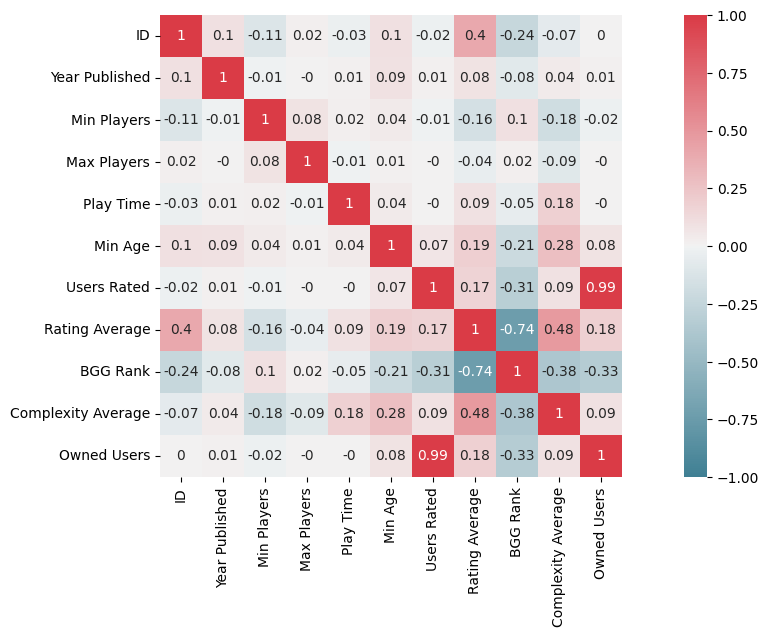

In [147]:
#Visualizing Correlations

board_corr=boardgames.select_dtypes(include=["number"]).corr().round(2)
plt.figure(figsize=(16,6))
sns.heatmap(board_corr, cmap=sns.diverging_palette(220,10, as_cmap=True), vmin=-1.0, vmax=1.0, annot=True, square=True)


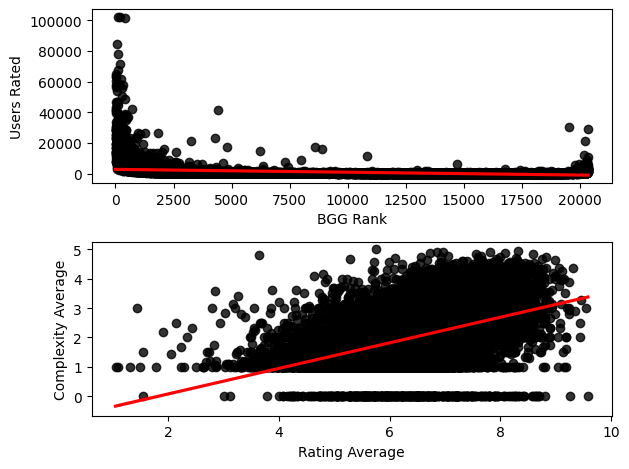

In [148]:
#Visualizing correlation between "BGG Ran"k and "Users Rated" AND "Rating Average" and "Complexity Average"

fig, axs=plt.subplots(nrows=2)
sns.regplot(x="BGG Rank", y="Users Rated", data=boardgames, ax=axs[0], scatter_kws={"color":"black"}, line_kws={"color":"red"})
sns.regplot(x="Rating Average", y="Complexity Average", data=boardgames, ax=axs[1], scatter_kws={"color":"black"}, line_kws={"color":"red"})
fig.tight_layout()
plt.show()


Mean Rating Average:6.4


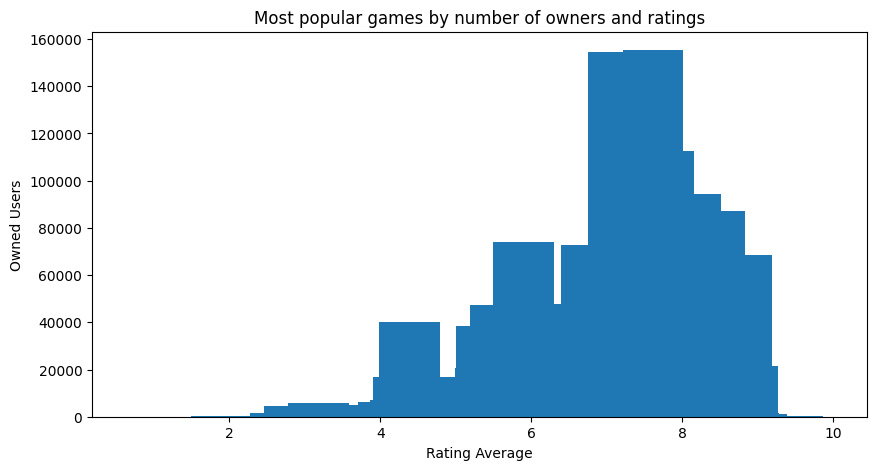

In [149]:
#Distribution of Rating Average with Owned Users. 

print(f"Mean Rating Average:{boardgames['Rating Average'].mean().round(2)}")
plt.figure(figsize=(10,5))
plt.bar(boardgames["Rating Average"], boardgames["Owned Users"])
plt.xlabel("Rating Average")
plt.ylabel("Owned Users")
plt.title("Most popular games by number of owners and ratings")
plt.show()

In [156]:
#Splitting Mechanics and Domains in unique categories with dummy variables

#Creating a list of unique mechanics
all_mechanics=[]
for mechanic in boardgames["Mechanics"]:
    group_mechanic=mechanic.split(",")
    for words in group_mechanic:
        words=words.split("/")
        for word in words:
            word=word.replace(",","").strip()
            if word=="Unknown Mechanics":
                continue
            elif word not in all_mechanics:
                all_mechanics.append(word)

#Creating a list of unique domains
all_domains=[]
for domain in boardgames["Domains"]:
    group_domain=domain.split(",")
    for words in group_domain:
        words=words.split("/")
        for word in words:
            word=word.replace(",","").strip()
            if word=="Unknown Domain":
                continue
            elif word not in all_domains:
                all_domains.append(word)
        

print("Total unique mechanics:", len(all_mechanics))
print("Total unique domains:", len(all_domains))

#Creating Dummy variables

#Creating new Dataframe with all mechanics as categories
boardgames_cat=boardgames

for mechanic in all_mechanics:
    boardgames_cat[mechanic]=np.where(boardgames_cat["Mechanics"].str.contains(mechanic),1,0)

#Creating new Dataframe with all domains as categories
for domain in all_domains:
    boardgames_cat[domain]=np.where(boardgames_cat["Domains"].str.contains(domain),1,0)
    

display(boardgames_cat.head())
display(len(boardgames_cat.columns))

Total unique mechanics: 194
Total unique domains: 8


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,...,Impulse Movement,Hot Potato,Strategy Games,Thematic Games,Wargames,Family Games,Customizable Games,Abstract Games,Party Games,Children's Games
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,...,0,0,1,1,0,0,0,0,0,0
1,161936,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,...,0,0,1,1,0,0,0,0,0,0
2,224517,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,...,0,0,1,0,0,0,0,0,0,0
3,167791,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,...,0,0,1,0,0,0,0,0,0,0
4,233078,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,...,0,0,1,1,0,0,0,0,0,0


216

C:\Users\Leonardo Barrera\AppData\Local\Temp\ipykernel_56672\4219396973.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat([df,new_row], ignore_index=True)


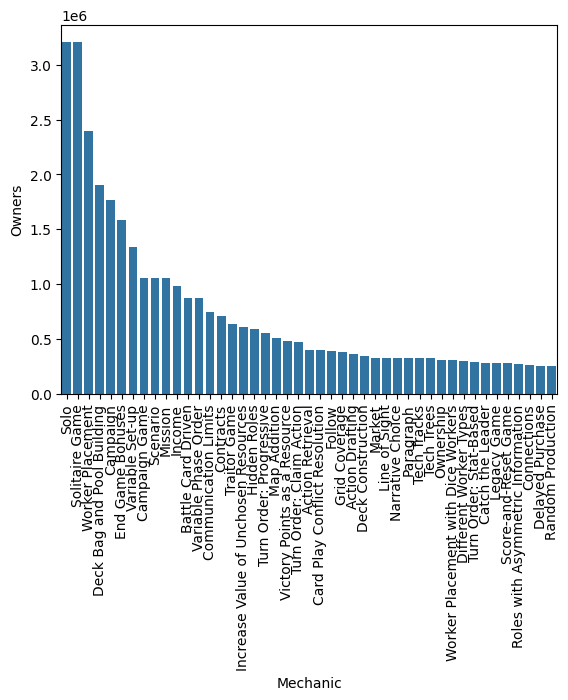

In [151]:
#Find the best Mechanic by owner and rating. 

#Creating a new Dataframe
df=pd.DataFrame(columns=["Mechanic", "Mean Rating Average", "Quantity of boardgames", "Owners"])

#Loop through all mechanics
for mechanic in all_mechanics:
    #Calculate the mean and quantity "Rating Average" for games with the current mechanic
    mean_rating=boardgames_cat.loc[boardgames_cat[mechanic]==1, "Rating Average"].mean()
    quantity=boardgames_cat.loc[boardgames_cat[mechanic]==1, "Rating Average"].count()
    owners=boardgames_cat.loc[boardgames_cat[mechanic]==1, "Owned Users"].sum()

    #Append quantity and mean rating to the Dataframe
    new_row=pd.DataFrame({"Mechanic":[mechanic], "Mean Rating Average":[mean_rating], "Quantity of boardgames":[quantity], "Owners":[owners]})   
    df=pd.concat([df,new_row], ignore_index=True)

#Best Board games Mechanics by Rating and Owners
best_and_popular_mechanics=df[(df["Mean Rating Average"]>df["Mean Rating Average"].median()) & (df["Owners"]>df["Owners"].median())].sort_values("Owners", ascending=False).round(1)


sns.barplot(x="Mechanic", y="Owners", data=best_and_popular_mechanics)
plt.xticks(rotation=90)
plt.show()

In [152]:
#Modeling
#We need to find which parameters really determine the maximum possible rating. We´ll model taking into account only the mechanics.

features=all_mechanics

X=boardgames_cat[features].values
y=boardgames_cat["Rating Average"].values

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
forest=RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42)
forest.fit(X_train, y_train)

#Evaluate model performance on a test set
test_score=forest.score(X_test, y_test)

print("R^2 on the test data:", test_score)
print("Standard Deviation is: ", boardgames_cat["Rating Average"].std())



R^2 on the test data: 0.28576230698751437
Standard Deviation is:  0.9355073686140417


In [153]:
#Creating a Dataframe with the most important mechanics of the model

feature_importances=forest.feature_importances_
feature_importance_df=pd.DataFrame({"Feature": features, "Importance": feature_importances})
feature_importance_df=feature_importance_df.sort_values(by="Importance", ascending=False)

top_features=feature_importance_df[feature_importance_df["Importance"]>0.01]
print(f"Top {len(top_features)} features:")
print(top_features)

#Getting the Boardgame data set with the best features, best Rating and best quantity of Owned Users

top_feature_list=list(top_features["Feature"])
all_feature_final=['ID', 'Name', 'Rating Average', 'BGG Rank', 'Play Time', 'Mechanics', 'Owned Users', 'Min Players', 'Max Players']  + top_feature_list
print("Total boardgames at the beginning: ", len(boardgames))

#Creating the Dataset with all important features

final_game=boardgames_cat[all_feature_final]

#The best Rating Average and Owned Users quantity
final_game=final_game[final_game["Rating Average"]>final_game["Rating Average"].median()]
final_game=final_game[final_game["Owned Users"]>150]

print("Total boardgames after filter by more than median Rating: ", len(final_game))

display(final_game)




Top 24 features:
                        Feature  Importance
145               Spin and Move    0.188160
22       Variable Player Powers    0.095728
64                   Simulation    0.074004
11                 Hexagon Grid    0.041643
83             Worker Placement    0.035810
19                         Solo    0.035465
8    Deck Bag and Pool Building    0.033743
6              Cooperative Game    0.030993
30   Network and Route Building    0.026757
20               Solitaire Game    0.026097
9                 Grid Movement    0.024611
10              Hand Management    0.023224
37                     Drafting    0.020480
61                       Action    0.020414
43                Area Majority    0.016645
44                    Influence    0.016562
46                 Dice Rolling    0.016304
2                      Campaign    0.013362
25               Set Collection    0.012341
144                        Roll    0.012302
13                Modular Board    0.011178
58             

,ID,Name,Rating Average,BGG Rank,Play Time,Mechanics,Owned Users,Min Players,Max Players,Spin and Move,...,Area Majority,Influence,Dice Rolling,Campaign,Set Collection,Roll,Modular Board,Area Movement,Tile Placement,Chit-Pull System
0,174430,Gloomhaven,8.79,1,120,"Action Queue, Action Retrieval, Campaign / Bat...",68323,1,4,0,...,0,0,0,1,0,0,1,0,0,0
1,161936,Pandemic Legacy: Season 1,8.61,2,60,"Action Points, Cooperative Game, Hand Manageme...",65294,2,4,0,...,0,0,0,0,1,0,0,0,0,0
2,224517,Brass: Birmingham,8.66,3,120,"Hand Management, Income, Loans, Market, Networ...",28785,2,4,0,...,0,0,0,0,0,0,0,0,0,0
3,167791,Terraforming Mars,8.43,4,120,"Card Drafting, Drafting, End Game Bonuses, Han...",87099,1,5,0,...,0,0,0,0,1,0,0,0,1,0
4,233078,Twilight Imperium: Fourth Edition,8.70,5,480,"Action Drafting, Area Majority / Influence, Ar...",16831,3,6,0,...,1,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,290822,Peaky Blinders: Under New Management,6.54,15168,90,"Betting and Bluffing, Deduction, Dice Rolling,...",215,2,4,0,...,0,0,1,0,0,1,0,0,0,0
15316,199007,Adventure Time Card Wars: Doubles Tournament,6.72,15318,45,"Team-Based Game, Variable Player Powers",180,4,4,0,...,0,0,0,0,0,0,0,0,0,0
15690,165044,EverZone: Strategic Battles in the Universe,6.73,15692,30,"Deck Bag and Pool Building, Player Elimination...",205,2,6,0,...,0,0,0,0,0,0,0,0,0,0
15698,270077,Charmed and Dangerous: The Sisters Grimm - Bas...,6.53,15700,40,"Cooperative Game, Hand Management, Role Playin...",235,1,4,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:

#Filtering the main features and chose only the 10% of the best ratings of boardgame by each feature

def BestGameChosing(dataframe, feature):
    best_boardgames=dataframe.copy()
    best_boardgames=best_boardgames.reset_index(drop=True)
    best_boardgames=best_boardgames[best_boardgames[feature]>0].sort_values("Rating Average", ascending=False)
    if best_boardgames.empty:
        print(f"no data found for feature {feature}>0")
        return set()
    best_boardgames=best_boardgames[~best_boardgames.index.duplicated(keep="first")]
    best_boardgames=best_boardgames.reset_index(drop=True).reset_index().drop_duplicates(subset="index", keep="first").set_index("index")
    best_boardgames=best_boardgames[(best_boardgames.index>np.percentile(best_boardgames.index,0)) & (best_boardgames.index<=np.percentile(best_boardgames.index,10))]
    return set(best_boardgames.index)

best_boardgames_index=set()

for feature in top_feature_list:
    list_of_index=BestGameChosing(dataframe=final_game, feature=feature)
    best_boardgames_index.update(list_of_index)


final_game=final_game[final_game.index.isin(best_boardgames_index)]
display(final_game)



,ID,Name,Rating Average,BGG Rank,Play Time,Mechanics,Owned Users,Min Players,Max Players,Spin and Move,...,Area Majority,Influence,Dice Rolling,Campaign,Set Collection,Roll,Modular Board,Area Movement,Tile Placement,Chit-Pull System
1,161936,Pandemic Legacy: Season 1,8.61,2,60,"Action Points, Cooperative Game, Hand Manageme...",65294,2,4,0,...,0,0,0,0,1,0,0,0,0,0
2,224517,Brass: Birmingham,8.66,3,120,"Hand Management, Income, Loans, Market, Networ...",28785,2,4,0,...,0,0,0,0,0,0,0,0,0,0
3,167791,Terraforming Mars,8.43,4,120,"Card Drafting, Drafting, End Game Bonuses, Han...",87099,1,5,0,...,0,0,0,0,1,0,0,0,1,0
4,233078,Twilight Imperium: Fourth Edition,8.70,5,480,"Action Drafting, Area Majority / Influence, Ar...",16831,3,6,0,...,1,1,1,0,0,1,1,0,0,0
5,291457,Gloomhaven: Jaws of the Lion,8.87,6,120,"Action Queue, Campaign / Battle Card Driven, C...",21609,1,4,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2653,Survive: Escape from Atlantis!,7.31,287,60,"Action Points, Dice Rolling, Grid Movement, He...",29331,2,4,0,...,0,0,1,0,0,1,1,0,0,0
287,234487,Altiplano,7.54,288,120,"Action Points, Contracts, Deck Bag and Pool Bu...",9511,2,5,0,...,0,0,0,0,0,0,0,0,0,0
288,1,Die Macher,7.63,289,240,"Alliances, Area Majority / Influence, Auction/...",7213,3,5,0,...,1,1,1,0,0,1,0,0,0,0
289,199042,Harry Potter: Hogwarts Battle,7.46,290,60,"Cooperative Game, Deck Bag and Pool Building, ...",24045,2,4,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the m

Text(0.5, 1.0, 'Min/Max players by Ratings distributions')

C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


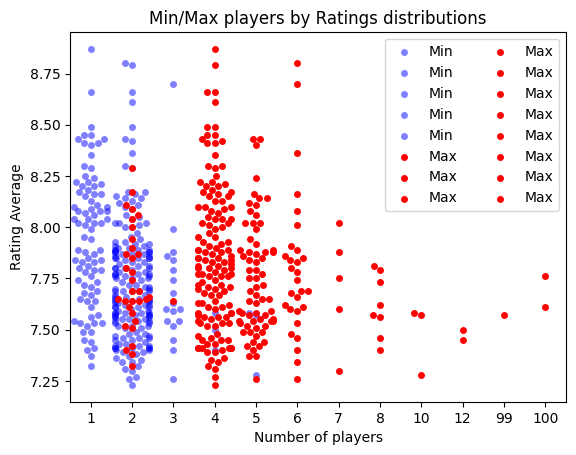

In [155]:
#Min/Max players by Ratings Distribution
min_players=sns.swarmplot(x="Min Players", y="Rating Average", data=final_game, color="blue", alpha=0.5, label="Min")
max_players=sns.swarmplot(x="Max Players", y="Rating Average", data=final_game, color="red", label="Max")
plt.xlabel("Number of players")
plt.legend(ncols=2)
plt.title("Min/Max players by Ratings distributions")

In [158]:
#THE CHOICE
map_of_players=final_game.groupby(["Min Players", "Max Players"]).max().reset_index().sort_values("Rating Average", ascending=False)

display(map_of_players)






,Min Players,Max Players,ID,Name,Rating Average,BGG Rank,Play Time,Mechanics,Owned Users,Spin and Move,...,Area Majority,Influence,Dice Rolling,Campaign,Set Collection,Roll,Modular Board,Area Movement,Tile Placement,Chit-Pull System
1,1,4,316554,Viscounts of the West Kingdom,8.87,283,1000,"Increase Value of Unchosen Resources, Modular ...",52934,0,...,1,1,1,1,1,1,1,1,1,0
11,2,6,283355,Western Legends,8.80,286,360,"Hidden Movement, Memory, Point to Point Moveme...",66489,0,...,1,1,1,1,1,1,1,1,1,0
9,2,4,287954,Yokohama,8.79,291,240,"Race, Square Grid, Team-Based Game, Three Dime...",155312,0,...,1,1,1,1,1,1,1,1,1,0
17,3,6,233078,Twilight Imperium: Third Edition,8.70,278,480,"Race, Simultaneous Action Selection, Storytell...",69850,0,...,1,1,1,0,0,1,1,1,1,0
2,1,5,286096,Wingspan,8.43,269,200,"Drafting, Solo / Solitaire Game, Variable Play...",87099,0,...,1,1,1,1,1,1,1,1,1,0
7,2,2,274364,YINSH,8.29,280,480,Real-Time,94343,0,...,1,1,1,1,1,1,1,0,1,0
0,1,2,205637,The Lord of the Rings: The Card Game,8.17,129,120,"Cooperative Game, Deck Construction, Events, H...",50883,0,...,0,0,0,1,0,0,0,0,0,0
10,2,5,284083,Vindication,8.14,288,240,"Ownership, Turn Order: Claim Action, Turn Orde...",149337,0,...,1,1,1,1,1,1,1,1,1,0
3,1,6,203420,Zombicide: Black Plague,8.08,228,180,"Cooperative Game, Dice Rolling, Modular Board,...",39747,0,...,0,0,1,1,0,1,1,0,1,0
4,1,7,102794,Caverna: The Cave Farmers,8.02,30,210,"Automatic Resource Growth, Increase Value of U...",35475,0,...,0,0,0,0,0,0,0,0,1,0
